#### Example conversion jp2 to zarr

In [ ]:
import glymur
import zarr

glymur.set_option('lib.num_threads', 2)
jp2 = glymur.Jp2k('./0539046440-0050.jp2')
print('jp2 image shape {}'.format(jp2.shape))
zarr.save('./test.zarr', jp2[:])

#### Compare `uint16` to `uint8` type conversion

Matching the uint16-->uint8 conversion function to that used to obtain the reference .tiff image set that were used to train the network. 

In [1]:
import zarr
from aicsimageio import imread
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
#Reference green channel patch:
ref = imread('/home/rohan/Dropbox/AllenInstitute/CellCount/dat/raw/Unet_tiles_082020_G/527100_1027993339_0050_tile_3_6_green.tif')
ref = np.squeeze(ref)

#Open uint8 zarr file and cut patch corresponding to reference patch:
f = zarr.open('./test.zarr/')
test = np.squeeze(f[6144:8192,12288:14336,1])

In [3]:
print(f'ref  : {ref.dtype}')
print(f'test : {test.dtype}')

ref  : uint8
test : uint16


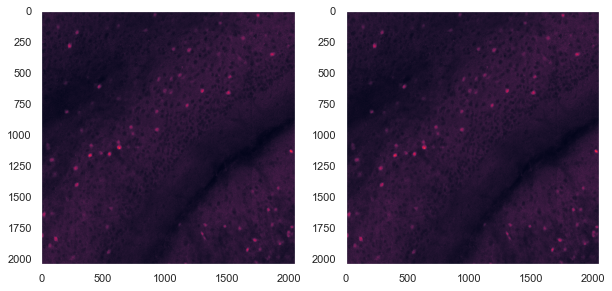

In [4]:
#Plot side by side:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ref)
plt.grid(False)
plt.subplot(122)
plt.imshow(test)
plt.grid(False)
plt.show()

In [5]:
convert = lambda im:np.uint8(np.round(im.astype(float)*(2**8)/(2**16-1)))
test_u8 = convert(test)

In [6]:
assert np.array_equal(test_u8,ref), "conversion does not lead to identical values"

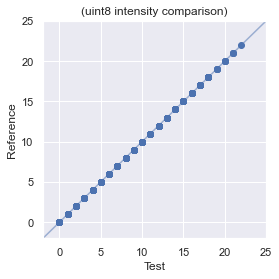

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(np.ravel(test_u8),np.ravel(ref))
plt.plot([-2,25],[-2,25],alpha=0.5,marker='None')
ax = plt.gca()
ax.set_title('(uint8 intensity comparison)')
ax.set_ylabel('Reference')
ax.set_xlabel('Test')
ax.set_xlim(-2,25)
ax.set_ylim(-2,25)
plt.show()